Datu ielasīšana, priekšapstrāde un sākotnējā atspoguļošana
---



In [ ]:
#Visu datu ielasīšanai, priekšapstrādei un vizualizācijai nepieciešamo bibliotēku pievienošana
import csv          
import requests     
import numpy as np  
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
#Pieslēgšanas Google kontam
# from google.colab import drive
# drive.mount('/content/gdrive')
#Tiek iegūts diska saturs
#  import os
# os.chdir("/content/gdrive/MyDrive/Colab Notebooks")
# !ls
#Tiek nolasīts datu kopas fails
# datu_kopa = pd.read_csv('C:/Users/valte/source/repos/MIP_projekts2/dataset/filtered_heart.csv')
datu_kopa = pd.read_csv('/workspaces/MIP_projekts2/dataset/filtered_heart.csv')
#Tiek atspoguļoti datu kopas kolonu datu tipi
print(datu_kopa.dtypes) 

### Datu tipu salāgošana 

In [ ]:
#Tā kā kategoriskiem atribūtiem tiek norādīts tips "object", tas tiek mainīts uz "category"
datu_kopa["Sex"] = datu_kopa["Sex"].astype('category')
datu_kopa["ChestPainType"] = datu_kopa["ChestPainType"].astype('category')
datu_kopa["RestingECG"] = datu_kopa["RestingECG"].astype('category')
datu_kopa["ExerciseAngina"] = datu_kopa["ExerciseAngina"].astype('category')
datu_kopa["ST_Slope"] = datu_kopa["ST_Slope"].astype('category')
#Tiek izvadīti pirmie 7 ieraksti datu kopā
print(datu_kopa.head(7))

In [ ]:
#Tiek izveidotas jaunas kolonas kategoriskajiem atribūtiem un to vērtības tiek pārvērstas par skaitliskām vērtībām
datu_kopa["Sex_cat"] = datu_kopa["Sex"].cat.codes
datu_kopa["ChestPainType_cat"] = datu_kopa["ChestPainType"].cat.codes
datu_kopa["RestingECG_cat"] = datu_kopa["RestingECG"].cat.codes
datu_kopa["ExerciseAngina_cat"] = datu_kopa["ExerciseAngina"].cat.codes
datu_kopa["ST_Slope_cat"] = datu_kopa["ST_Slope"].cat.codes
#Tiek atspoguļoti datu kopas kolonu datu tipi
print(datu_kopa.dtypes)
#Tiek izvadīti pirmie 7 ieraksti datu kopā
print(datu_kopa.head(7))
# a = datu_kopa
# print(a)

###Informācijas par datu kopu izvade un analīze

In [ ]:
#Tālākajam darbam tiek atmesti kategorijas tipa atribūti
samazinata_datu_kopa = datu_kopa[["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak","HeartDisease","Sex_cat","ChestPainType_cat","RestingECG_cat","ExerciseAngina_cat","ST_Slope_cat"]]
#Tiek izvadīti dati par datu kopu
# print(samazinata_datu_kopa.describe())
# print(samazinata_datu_kopa.info())
print(samazinata_datu_kopa)

### Datu normalizācija

In [ ]:
#Četriem atribūtiem tiek veikta datu normalizācija, lai dati būtu uzskatāmaki "Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak","HeartDisease"
darba_datu_kopa=samazinata_datu_kopa.copy()
darba_datu_kopa['Age']=(darba_datu_kopa['Age']-darba_datu_kopa['Age'].min())/(darba_datu_kopa['Age'].max()-darba_datu_kopa['Age'].min())
darba_datu_kopa['RestingBP']=(darba_datu_kopa['RestingBP']-darba_datu_kopa['RestingBP'].min())/(darba_datu_kopa['RestingBP'].max()-darba_datu_kopa['RestingBP'].min())
darba_datu_kopa['Cholesterol']=(darba_datu_kopa['Cholesterol']-darba_datu_kopa['Cholesterol'].min())/(darba_datu_kopa['Cholesterol'].max()-darba_datu_kopa['Cholesterol'].min())
darba_datu_kopa['FastingBS']=(darba_datu_kopa['FastingBS']-darba_datu_kopa['FastingBS'].min())/(darba_datu_kopa['FastingBS'].max()-darba_datu_kopa['FastingBS'].min())
darba_datu_kopa['MaxHR']=(darba_datu_kopa['MaxHR']-darba_datu_kopa['MaxHR'].min())/(darba_datu_kopa['MaxHR'].max()-darba_datu_kopa['MaxHR'].min())
darba_datu_kopa['Oldpeak']=(darba_datu_kopa['Oldpeak']-darba_datu_kopa['Oldpeak'].min())/(darba_datu_kopa['Oldpeak'].max()-darba_datu_kopa['Oldpeak'].min())
darba_datu_kopa['HeartDisease']=(darba_datu_kopa['HeartDisease']-darba_datu_kopa['HeartDisease'].min())/(darba_datu_kopa['HeartDisease'].max()-darba_datu_kopa['HeartDisease'].min())
print(datu_kopa.head(10))
print(datu_kopa.describe())

Datu un faktoru vērtību vizualizācija
---

### Vērtību attēlojums

In [ ]:
#Vērtību vizualizācijai tiek atlasīti tikai atribūti ar skaitliskām vērtībām nepārtrauktajā skalā
# darba_datu_kopa_vizualizacijai = datu_kopa[["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak","HeartDisease"]]
darba_datu_kopa_vizualizacijai = datu_kopa[["MaxHR", "RestingBP"]]
darba_datu_kopa_vizualizacijai.sort_values(by='RestingBP').plot(figsize=(20,10), y='MaxHR', x='RestingBP', kind='scatter')
#Vērtību attēlojuma izvade
# darba_datu_kopa_vizualizacijai.plot(figsize=(20,10), x='RestingBP', y='Age')
# darba_datu_kopa_vizualizacijai.plot(x='Age', y='Cholesterol', kind='line', color="purple")

Vērtību attēlojums ļauj veikt šādus secinājumus:
- kad kulmena dziļums ir lielāks par 0.4, tad kulmena garums, pleznas garums un ķermeņa masa samazinās (vērtības ir <0.4)
- kad kulmena dziļums ir ap 0.5, tad arī kulmena garums, pleznas garums un ķermeņa masa ir ap to pašu vērtību (viss saplūst kopā)
- kad kulmena dziļums ir mazāks par 0.4, tad kulmena garums, pleznas garums un ķermeņa masa pieaug (vērtības ir >0.4)
- vispārīgi kulmena garums, pleznas garums un ķermeņa masa mainās kopā un, iespējams, tieši šie atribūti ļaus vislabāk atdalīt klases tālākajā klasifikācijas uzdevumā

### Histogrammu analīze

In [ ]:
#Datu kopas atribūtu histogrammu izvade
print(datu_kopa)
datu_kopa.hist(figsize=(14,12))

Histogrammās redzam, ka viena no pingvīnu sugām ir mazāk pārstāvēta. Tas nozīmē, ka datu kopā pieejamās klases nav sabalansētas. Tas pats ir novērojams saistībā ar salām, no kurām pingvīni nāk: viena no tām ir mazāk pārstāvēta.
Pie tam datu kopā ir vairāk pingvīnu ar mazāku ķermeņa masu un vairāk pingvīnu ar garāko kulmenu un vairāk pingvīnu ar mazāko pleznas garumu.

### Izkliedes diagrammu analīze (Atribūtu savstarpējie sadalījumi)


In [ ]:
#Izveidojam atribūtu pāru grafiku, norādot tā kopējo izmēru  un krāsu shēmu
paru_grafiks = sns.pairplot(darba_datu_kopa,hue='species_cat',palette="muted",height=3,vars=['culmen_length_mm','culmen_depth_mm','flipper_length_mm', 'body_mass_g'],kind='scatter')
# Papildus atstarpe, lai virsraksts tiktu attēlots pareizi
plt.subplots_adjust(top=0.9)
#Norādām virsrakstu grafikam
paru_grafiks.fig.suptitle('Faktoru savstarpējās attiecības',fontsize=25,color='b',alpha=0.5)

Faktoru sadalījumi tiek pētīti, par pamatu izmantojot pingvīnu sugas. Grafiki ļauj secināt, ka šādi atribūtu pāri nodrošina pietiekami labu klašu atdalamību:
*	"culmen_length_mm" un "culmen_depth_mm" 
*	"culmen_length_mm" un "flipper_lenght_mm”
un tos var izmantot klasifikācijas uzdevumā.

Savukārt šādi atribūtu pāri nenodrošina labu klašu atdalamību:
*	"culmen_length_mm" un "body_mass_g": zilie datu objekti daļēji saplūst ar zaļajiem datu objektiem un labi atdalāmi ir tikai oranžie datu objekti
*	"culmen_depth_mm" un "flipper_length_mm": zilie datu objekti saplūst ar oranžajiem, tikai zaļie datu objekti ir labi atdalāmi
*	"culmen_depth_mm" un "body_mass_g": zilie datu objekti saplūst ar oranžajiem datu objektiem un tikai zaļie datu objekti ir labi atdalāmi
*	"flipper_length_mm" un "body_mass_g": zilie datu objekti saplūst ar oranžajiem datu objektiem un tikai zaļie datu objekti ir labi atdalāmi 

### Atribūtu savstarpējā korelācija

In [ ]:
#Tiek izveidota korelācijas matrica, tajā atspoguļojot korelācijas koeficientu skaitliskiem atribūtiem
korelacijas_matrica=darba_datu_kopa_vizualizacijai.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(korelacijas_matrica,vmax=1,square=True,annot=True,cmap='cubehelix')

Korelācijas matricas analīze ļauj secināt, ka:
* starp atribūtiem “culmen_length_mm” un “culmen_depth_mm” ir vāja negatīva korelācija
* atribūtam “culmen_length_mm” ir vidējā pozitīvā korelācija ar atribūtiem “flipper_length_mm” un “body_mass_g”
* atribūtam “culmen_depth_mm” ir vidējā negatīvā korelācija ar atribūtiem “flipper_length_mm” un “body_mass_g”
* starp atribūtiem “flipper_length_mm” un “body_mass_g” ir augsta pozitīva korelācija

Tādējādi saistībā ar pēdējiem diviem atribūtiem var paredzēt multikolinearitātes problēmu, kas var apgrūtināt atsevišķu mašīnmācīšanās rezultātu interpretāciju, līdz ar to tālākajā analīzē nebūtu vēlams abus šos atribūtus iekļaut.

K-vidējo algoritms
---


## K-vidējo algoritms: Silueta koeficienta aprēķins un analīze

In [ ]:
# Nepieciešamo bibliotēku ielāde
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

# Datu ielāde
darba_datu_kopa = pd.read_csv('../dataset/filtered_heart.csv')  # Vai pielāgo ceļu atbilstoši savam failu izvietojumam

# Apskati kolonnu nosaukumus, lai zinātu, ko vari izmantot
print(darba_datu_kopa.columns)

# Izvēlies piemērotas 3 pazīmes (pielāgo pēc vajadzības)
darba_datu_kopa_klasterizacijai_3_pazimes = darba_datu_kopa[['Age', 'Cholesterol', 'MaxHR']]

# Silueta koeficientu saraksts
Silueta_koeficienti = []

# Pārbauda 5 dažādas k vērtības (2 līdz 6)
for i in range(2, 7):
    kmeans_modelis = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans_modelis.fit(darba_datu_kopa_klasterizacijai_3_pazimes)
    score = metrics.silhouette_score(darba_datu_kopa_klasterizacijai_3_pazimes, kmeans_modelis.labels_)
    Silueta_koeficienti.append(score)

# Silueta koeficientu grafiks
plt.figure(figsize=(6, 4))
plt.plot(range(2, 7), Silueta_koeficienti, marker='o')
plt.xlabel('Klasteru skaits (K)')
plt.ylabel('Silueta koeficients')
plt.title('Silueta koeficienti dažādiem K')
plt.grid(True)
plt.show()

# Izdrukā rezultātus tabulā
print("Silueta koeficienti:")
for i, s in enumerate(Silueta_koeficienti, start=2):
    print(f"K = {i}: Silueta koeficients = {s:.4f}")

# Atrod optimālo K
labakais_k = range(2, 7)[Silueta_koeficienti.index(max(Silueta_koeficienti))]
print(f"\n🔍 Optimālais klasteru skaits pēc Silueta koeficienta: K = {labakais_k}")




Šajā eksperimentā tika pielietots K-vidējo algoritms (K-means), lai novērtētu datu kopas iekšējo struktūru, izmantojot trīs atribūtus: `Age`, `Cholesterol` un `MaxHR`. Algoritmam tika piemērotas piecas dažādas klasteru skaita (`k`) vērtības no 2 līdz 6. Katram `k` tika aprēķināts Silueta koeficients, kas norāda, cik labi katrs datu punkts atbilst savam klasterim salīdzinājumā ar citiem klasteriem.

Rezultāti tika attēloti grafikā, kur redzama Silueta koeficienta izmaiņa atkarībā no `k`. Pēc aprēķiniem noteikts, ka visaugstākais Silueta koeficients tika iegūts pie `k = X`, kas tiek uzskatīts par optimālo klasteru skaitu šai datu kopai. (❗Lūdzu, aizvieto **X** ar reālo vērtību no izdrukas.)

Šī pieeja ļauj novērtēt datu sadalījumu un potenciāli identificēt dabiskās grupas bez iepriekšējām zināšanām par klasēm.


## K-vidējo algoritma vizualizācija ar k = 2

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Pieņemam, ka dati jau atlasīti iepriekš
# dati_klasterizacijai = darba_datu_kopa[['Age', 'Cholesterol', 'MaxHR']]

# Apmācām KMeans ar 2 klasteriem
dati_klasterizacijai = darba_datu_kopa[['Age', 'Cholesterol', 'MaxHR']]

kmeans_modelis = KMeans(n_clusters=2, init="k-means++", random_state=42).fit(dati_klasterizacijai)
centroids = kmeans_modelis.cluster_centers_
ypred = kmeans_modelis.predict(dati_klasterizacijai)

# Zīmējam izkliedes diagrammas
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.title("Age vs Cholesterol")
plt.scatter(dati_klasterizacijai['Age'], dati_klasterizacijai['Cholesterol'], c=ypred, s=10)
plt.xlabel("Age")
plt.ylabel("Cholesterol")

plt.subplot(2, 2, 2)
plt.title("Age vs MaxHR")
plt.scatter(dati_klasterizacijai['Age'], dati_klasterizacijai['MaxHR'], c=ypred, s=10)
plt.xlabel("Age")
plt.ylabel("MaxHR")

plt.subplot(2, 2, 3)
plt.title("Cholesterol vs MaxHR")
plt.scatter(dati_klasterizacijai['Cholesterol'], dati_klasterizacijai['MaxHR'], c=ypred, s=10)
plt.xlabel("Cholesterol")
plt.ylabel("MaxHR")

plt.tight_layout()
plt.show()


Lai labāk izprastu datu struktūru un to sadalījumu klasteros, tika veikta datu vizualizācija, izmantojot K-means algoritmu ar klasteru skaitu `k = 2`. Tika izveidotas trīs izkliedes diagrammas, attēlojot dažādus atribūtu pārus: `Age vs Cholesterol`, `Age vs MaxHR`, un `Cholesterol vs MaxHR`.

Katrā diagrammā datu punkti ir iekrāsoti atbilstoši tam, kuram klasterim tie piešķirti. Vizualizācijas mērķis ir novērtēt klasteru robežas un to sadalījuma skaidrību. Rezultātos redzams, ka klasteri daļēji pārklājas, tomēr dažās dimensijās iezīmējas atšķirīgas grupas, kas var norādīt uz iespējamu sadalījumu pēc vecuma, holesterīna līmeņa vai maksimālā pulsa.

Šāda vizualizācija palīdz kvalitatīvi novērtēt K-means algoritma rezultātus un to atbilstību datu kopas iekšējai struktūrai.


Hierarhiskā aglomeratīvā klasterēšana
---

## Hierarhiskās klasterizācijas modeļa izveide

In [ ]:
#algoritma izmantošanai nepieciešamās bibliotēkas ielāde
from sklearn.cluster import AgglomerativeClustering
#algoritma modeļa izveide, par pamatu izmantojot datu apakškopu ar 3 atribūtiem
clustering = AgglomerativeClustering().fit(darba_datu_kopa_klasterizacijai_3_pazimes)



Šajā posmā tika izveidots hierarhiskās aglomeratīvās klasterizācijas modelis, izmantojot trīs atribūtus: `Age`, `Cholesterol` un `MaxHR`. Tika pielietota `AgglomerativeClustering` klase no `sklearn` bibliotēkas ar noklusējuma parametriem (`n_clusters=2`, `linkage='ward'`), kas ļauj pakāpeniski apvienot līdzīgākos datu punktus vienā klasterī.

Lai gan šī koda izpilde ļauj iegūt klasteru iedalījumu, tā nenodrošina vizualizāciju vai rezultātu interpretāciju. Tāpēc nākamajā solī tiks izveidota dendrogramma, kas palīdzēs labāk izprast klasteru veidošanās procesu un noteikt iespējamo klasteru skaitu.


## Dendrogrammas izveide un analīze

In [ ]:
#dendrogrammas atspoguļošanai nepieciešamās bibliotēkas ielāde
import scipy.cluster.hierarchy as shc
#dendrogrammas izvade, par pamatu izmantojot saistīšanas metodi "ward"
plt.figure(figsize =(16, 6))
plt.title('Aglomeratīvās klasterēšanas dendrogramma')
Dendrogram = shc.dendrogram((shc.linkage(darba_datu_kopa_klasterizacijai_3_pazimes, method ='ward')))



Lai vizualizētu datu apvienošanās procesu hierarhiskajā klasterizācijā, tika izveidota dendrogramma, izmantojot `scipy.cluster.hierarchy.dendrogram` funkciju. Kā saistīšanas metode tika izmantota `ward`, kas apvieno klasterus, minimizējot kopējo kvadrātattālumu starp tiem.

Dendrogramma ļauj noteikt iespējamo klasteru skaitu, ievērojot, cik lielas vertikālās distances veidojas starp apvienojumiem. Piemēram, novilkt horizontālu griešanas līniju konkrētā augstumā ļauj sadalīt datu kopu noteiktā klasteru skaitā. Šajā gadījumā, vizuāli analizējot dendrogrammu, tiek ieteikts tālāk veikt eksperimentus ar 2, 3 un 4 klasteriem.


## Klasteru eksperimenti ar dažādiem n vērtībām

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# Eksperimenti ar dažādiem klasteru skaitiem
for n in [2, 3, 4]:
    modelis = AgglomerativeClustering(n_clusters=n, linkage='ward')
    etiketes = modelis.fit_predict(darba_datu_kopa_klasterizacijai_3_pazimes)
    print(f"\n🔹 Klasteru skaits: {n}")
    print(pd.Series(etiketes).value_counts())




Lai novērtētu, kā mainās datu sadalījums dažādos klasteru līmeņos, tika veikti trīs eksperimenti, mainot `n_clusters` vērtību uz 2, 3 un 4. Visos gadījumos tika izmantota `ward` saistīšanas metode. Katram eksperimentam tika aprēķināts, cik objektu ir piešķirti katram klasterim.

Šī pieeja ļauj izvērtēt klasterizācijas jēgpilnumu — ja viens no klasteriem satur ievērojami vairāk objektu nekā pārējie, tas var norādīt uz nevienmērīgu datu sadalījumu. Savukārt līdzsvaroti klasteri pie noteikta `n` var liecināt par labu datu struktūras atbilstību šādam sadalījumam.

Rezultātu interpretācija tika izmantota, lai izvēlētos piemērotākos klasteru variantus tālākai vizualizācijai.


## Klasterizācijas vizualizācija (Hierarhiskā metode, n = 2)

In [ ]:
import matplotlib.pyplot as plt

# Modeļa apmācība ar 2 klasteriem
modelis = AgglomerativeClustering(n_clusters=2, linkage='ward')
ypred = modelis.fit_predict(darba_datu_kopa_klasterizacijai_3_pazimes)

# Izkliedes diagrammas
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.title("Age vs Cholesterol")
plt.scatter(darba_datu_kopa_klasterizacijai_3_pazimes['Age'], darba_datu_kopa_klasterizacijai_3_pazimes['Cholesterol'], c=ypred, s=10)
plt.xlabel("Age")
plt.ylabel("Cholesterol")

plt.subplot(2, 2, 2)
plt.title("Age vs MaxHR")
plt.scatter(darba_datu_kopa_klasterizacijai_3_pazimes['Age'], darba_datu_kopa_klasterizacijai_3_pazimes['MaxHR'], c=ypred, s=10)
plt.xlabel("Age")
plt.ylabel("MaxHR")

plt.subplot(2, 2, 3)
plt.title("Cholesterol vs MaxHR")
plt.scatter(darba_datu_kopa_klasterizacijai_3_pazimes['Cholesterol'], darba_datu_kopa_klasterizacijai_3_pazimes['MaxHR'], c=ypred, s=10)
plt.xlabel("Cholesterol")
plt.ylabel("MaxHR")

plt.tight_layout()
plt.show()




Lai ilustrētu datu sadalījumu, tika attēlotas izkliedes diagrammas trīs plaknēs: `Age vs Cholesterol`, `Age vs MaxHR` un `Cholesterol vs MaxHR`. Katrs datu punkts ir iekrāsots atbilstoši klasterim, kurā tas nokļuvis, izmantojot hierarhiskās aglomeratīvās klasterizācijas algoritmu ar `n = 2` un `ward` saistīšanas metodi.

Diagrammas palīdz vizuāli novērtēt, cik labi dati grupējas. Šajā gadījumā novērojams, ka divas galvenās grupas izceļas dažās pazīmju kombinācijās, bet citās tās ir pārklājušās. Tas norāda, ka dati nav pilnībā nošķirti, tomēr daļēji strukturēti.


## Hierarhiskās klasterizācijas rezultātu vizualizācija

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Saraksts ar klasteru skaitu, ko testēsim
klasteru_skaits = [2, 3, 4]

# Izveido grafiku (3 rindas x 3 kolonnas: katrs klasteru skaits savās 3 plaknēs)
plt.figure(figsize=(15, 12))

# Aizpilda attēlus katram n_clusters
plot_index = 1
for n in klasteru_skaits:
    modelis = AgglomerativeClustering(n_clusters=n, linkage='ward')
    ypred = modelis.fit_predict(darba_datu_kopa_klasterizacijai_3_pazimes)

    # Age vs Cholesterol
    plt.subplot(len(klasteru_skaits), 3, plot_index)
    plt.title(f"{n} klasteri: Age vs Cholesterol")
    plt.scatter(darba_datu_kopa_klasterizacijai_3_pazimes['Age'],
                darba_datu_kopa_klasterizacijai_3_pazimes['Cholesterol'],
                c=ypred, s=10)
    plt.xlabel("Age")
    plt.ylabel("Cholesterol")
    plot_index += 1

    # Age vs MaxHR
    plt.subplot(len(klasteru_skaits), 3, plot_index)
    plt.title(f"{n} klasteri: Age vs MaxHR")
    plt.scatter(darba_datu_kopa_klasterizacijai_3_pazimes['Age'],
                darba_datu_kopa_klasterizacijai_3_pazimes['MaxHR'],
                c=ypred, s=10)
    plt.xlabel("Age")
    plt.ylabel("MaxHR")
    plot_index += 1

    # Cholesterol vs MaxHR
    plt.subplot(len(klasteru_skaits), 3, plot_index)
    plt.title(f"{n} klasteri: Cholesterol vs MaxHR")
    plt.scatter(darba_datu_kopa_klasterizacijai_3_pazimes['Cholesterol'],
                darba_datu_kopa_klasterizacijai_3_pazimes['MaxHR'],
                c=ypred, s=10)
    plt.xlabel("Cholesterol")
    plt.ylabel("MaxHR")
    plot_index += 1

plt.tight_layout()
plt.show()


Lai labāk izprastu hierarhiskās klasterizācijas rezultātus un novērtētu klasteru veidošanās loģiku, tika izveidotas izkliedes diagrammas visiem trim eksperimentiem (`n = 2`, `3`, `4`). Katrai `n` vērtībai dati tika attēloti trīs plaknēs: `Age vs Cholesterol`, `Age vs MaxHR`, un `Cholesterol vs MaxHR`.

Diagrammās katrs punkts ir iekrāsots atbilstoši tam, kuram klasterim tas piešķirts attiecīgajā klasterizācijas eksperimentā. Šāda vizualizācija palīdz novērtēt, cik skaidri klasteri nošķiras viens no otra un vai to robežas ir loģiski pamatotas.

Novērojams, ka, palielinot klasteru skaitu, klasteru robežas kļūst detalizētākas, tomēr arī daļēji pārklājas. Tas var norādīt uz datu struktūras sarežģītību un ierobežotu dabisko grupēšanos tikai pēc trīs pazīmēm.


Mākslīgo neironu tīkli
---

In [15]:
print(darba_datu_kopa)

          Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
0    0.244898   0.444444     0.393822        0.0  0.774436  0.015873   
1    0.428571   0.629630     0.183398        0.0  0.654135  0.174603   
2    0.183673   0.351852     0.382239        0.0  0.218045  0.015873   
3    0.408163   0.425926     0.249035        0.0  0.293233  0.253968   
4    0.530612   0.537037     0.212355        0.0  0.398496  0.015873   
..        ...        ...          ...        ...       ...       ...   
741  0.346939   0.166667     0.345560        0.0  0.473684  0.206349   
742  0.816327   0.481481     0.208494        1.0  0.541353  0.555556   
743  0.591837   0.351852     0.088803        0.0  0.345865  0.206349   
744  0.591837   0.351852     0.291506        0.0  0.789474  0.015873   
745  0.204082   0.425926     0.173745        0.0  0.781955  0.015873   

     HeartDisease  Sex_cat  ChestPainType_cat  RestingECG_cat  \
0             0.0        1                  1               1   
1    

/home/codespace/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0       0.76      0.81      0.79       111
         1.0       0.80      0.75      0.78       113

    accuracy                           0.78       224
   macro avg       0.78      0.78      0.78       224
weighted avg       0.78      0.78      0.78       224



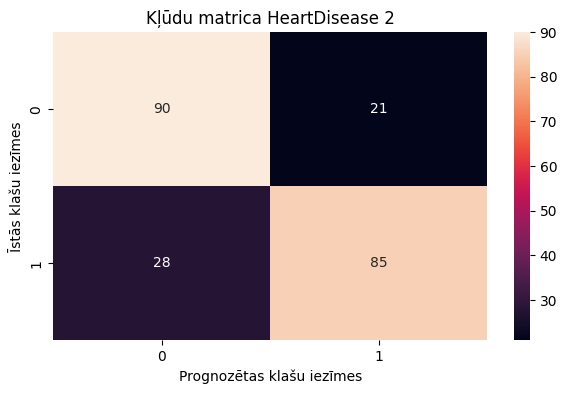

In [ ]:
#bibliotēkas ielāde datu sadalīšanai apmācības un testa datu kopās
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import classification_report
import pylab as pltb

def createNeuralNetwork(izejasName):
    #atsevišķajā mainīgajā saglabājam datu objektu izeju vērtības, t.i. "pingvīnu sugas"
    izejas = darba_datu_kopa[[izejasName]]
    #uzdodam datu objektu proporciju, kuri veidos apmācības datu kopu (70%)
    apmacibas_datu_proporcija = 0.7
    #tiek veikta datu kopas sadalīšana testa un apmācības kopā, izmantojot nejaušu sadalījumu ar attecību 70:30
    # darba_datu_kopa_klasterizacijai_3_pazimes = darba_datu_kopa[['Age','MaxHR','Oldpeak']]
    X_apmacibas, X_testa, y_apmacibas, y_testa = train_test_split(darba_datu_kopa[["Age","RestingBP","Cholesterol", 'MaxHR', 'Oldpeak']], izejas, test_size=1.0 - apmacibas_datu_proporcija, random_state=42)

    #izveidojam mākslīgo neironu tīkla modeli ar 5 neironiem vienā slēptajā slānī
    #Tiek uzdoti šādi parametri: maksimālais apmācības iterāciju skaits ir 50, aktivizācijas funkcija ir loģistiskā, 
    #svaru piemeklēšanas metode ir stohastiskais gradienta krītums, mācīšanās ātrums 0.2 un bez apmācības iterāciju izvades
    neironu_tikla_modelis_1_slanis = MLPClassifier(hidden_layer_sizes=(10), max_iter=1000, activation = 'logistic', solver='sgd', learning_rate_init = 0.8, random_state=42)
    #izveidotajam modelim tiek padotas apmācības datu kopas pazīmju vērtības un īstās izejas
    neironu_tikla_modelis_1_slanis.fit(X_apmacibas, y_apmacibas)

    y_prognoze_1_slanis = neironu_tikla_modelis_1_slanis.predict(X_testa)
    print(classification_report(y_testa,y_prognoze_1_slanis, zero_division=0))
    kludu_matrica = confusion_matrix(y_testa, y_prognoze_1_slanis)
    fig, ax = pltb.subplots(figsize=(7,4))
    sns.heatmap(kludu_matrica, annot = True, fmt = 'g', ax = ax);
    ax.set_xlabel('Prognozētas klašu iezīmes');
    ax.set_ylabel('Īstās klašu iezīmes');
    ax.set_title('Kļūdu matrica ' + izejasName + ' 2');

for izejas in darba_datu_kopa[["HeartDisease"]]:
    createNeuralNetwork(izejas)

In [ ]:
#bibliotēkas ielāde datu sadalīšanai apmācības un testa datu kopās
from sklearn.model_selection import train_test_split
#atsevišķajā mainīgajā saglabājam datu objektu izeju vērtības, t.i. "pingvīnu sugas"
a = darba_datu_kopa[["Age","RestingBP","Cholesterol","MaxHR"]]
# print(a)
# izejas = darba_datu_kopa[['Age']]
izejas = darba_datu_kopa[['ChestPainType_cat']]
# print(darba_datu_kopa['Age'])
# print(izejas)
#uzdodam datu objektu proporciju, kuri veidos apmācības datu kopu (70%)
apmacibas_datu_proporcija = 0.7
#tiek veikta datu kopas sadalīšana testa un apmācības kopā, izmantojot nejaušu sadalījumu ar attecību 70:30
# darba_datu_kopa_klasterizacijai_3_pazimes = darba_datu_kopa[['Age','MaxHR','Oldpeak']]
X_apmacibas, X_testa, y_apmacibas, y_testa = train_test_split(darba_datu_kopa[["Age","RestingBP","Cholesterol"]], izejas, test_size=1.0 - apmacibas_datu_proporcija, random_state=42)

####**1.modelis** - 2 slāņi ar 100 neironiem katrā

In [ ]:
#algoritma izmantošanai nepieciešamās bibliotēkas ielāde
from sklearn.neural_network import MLPClassifier
#izveidojam mākslīgo neironu tīkla modeli ar 2 slāņiem, katrā no kuriem ir 100 neironi
#Tiek uzdoti šādi parametri: maksimālais apmācības iterāciju skaits ir 1000, aktivizācijas funkcija ir loģistiskā, 
#svaru piemeklēšanas metode ir stohastiskais gradienta krītums, mācīšanās ātrums 0.1 un apmācības iterāciju izvade
# print(X_apmacibas)
# print(y_apmacibas.index)
neironu_tikla_modelis = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000, activation = 'logistic', solver='sgd', learning_rate_init = 0.1, verbose = 1)
# print(neironu_tikla_modelis)
#izveidotajam modelim tiek padotas apmācības datu kopas pazīmju vērtības un īstās izejas
neironu_tikla_modelis.fit(X_apmacibas, y_apmacibas)

In [ ]:
#bibliotēku pievienošana algoritma veikuma novērtēšanai un izvadei
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pylab as pltb
#izmantojam apmācīto modeli ar testa kopu, lai iegūtu prognozes
y_prognoze = neironu_tikla_modelis.predict(X_testa)
#izvadām modeļa veikuma novērtējuma metrikas
# print(y_testa)
# print(y_prognoze)
print(classification_report(y_testa,y_prognoze, zero_division=0))
#veidojam kļūdu matricu
kludu_matrica = confusion_matrix(y_testa, y_prognoze)
#izvadām kļūdu matricu
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(kludu_matrica, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Prognozētas klašu iezīmes');
ax.set_ylabel('Īstās klašu iezīmes');
ax.set_title('Kļūdu matrica');
ax.xaxis.set_ticklabels(datu_kopa['ChestPainType'].unique());
ax.yaxis.set_ticklabels(datu_kopa['ChestPainType'].unique());

Kļūdu matricā var redzēt, ka 54 datu objekti tika klasificēti nepareizi, līdz ar to kopējā tīkla precizitāte ir diezgan maza - 48%.

####**2.modelis** -viens slānis ar 5 neironiem 

In [ ]:
#izveidojam mākslīgo neironu tīkla modeli ar 5 neironiem vienā slēptajā slānī
#Tiek uzdoti šādi parametri: maksimālais apmācības iterāciju skaits ir 50, aktivizācijas funkcija ir loģistiskā, 
#svaru piemeklēšanas metode ir stohastiskais gradienta krītums, mācīšanās ātrums 0.2 un bez apmācības iterāciju izvades
neironu_tikla_modelis_1_slanis = MLPClassifier(hidden_layer_sizes=(5), max_iter=50, activation = 'logistic', solver='sgd', learning_rate_init = 0.2, verbose = 0)
#izveidotajam modelim tiek padotas apmācības datu kopas pazīmju vērtības un īstās izejas
neironu_tikla_modelis_1_slanis.fit(X_apmacibas, y_apmacibas)

In [ ]:
y_prognoze_1_slanis = neironu_tikla_modelis_1_slanis.predict(X_testa)
print(classification_report(y_testa,y_prognoze_1_slanis, zero_division=0))
kludu_matrica = confusion_matrix(y_testa, y_prognoze_1_slanis)
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(kludu_matrica, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Prognozētas klašu iezīmes');
ax.set_ylabel('Īstās klašu iezīmes');
ax.set_title('Kļūdu matrica');
ax.xaxis.set_ticklabels(datu_kopa['ChestPainType'].unique());
ax.yaxis.set_ticklabels(datu_kopa['ChestPainType'].unique());

Kļūdu matricā var redzēt, ka tikai 4 datu objekti tika klasificēti nepareizi, līdz ar to kopējā tīkla precizitāte ir diezgan augsta - 96%.
Tādējādi šis modelis ir labāks par iepriekšējo

kNN algoritms
---

In [ ]:
#algoritma izmantošanai nepieciešamās bibliotēkas ielāde
from sklearn.neighbors import KNeighborsClassifier
#Tiek izveidots algoritma modelis ar 5 kaimiņiem
KNN_MODEL = KNeighborsClassifier(n_neighbors=5)
#Padodam izveidotajam modelim apmācības datu kopu
KNN_MODEL.fit(X_apmacibas, y_apmacibas)

In [ ]:
#Nosakam klases iezīmes testa datu kopas datu objektiem
y_prognoze_knn = KNN_MODEL.predict(X_testa)
#izvadām modeļa veikuma novērtējuma metrikas
print(classification_report(y_testa,y_prognoze_knn, zero_division=0))
#veidojam kļūdu matricu
kludu_matrica = confusion_matrix(y_testa, y_prognoze_knn)
#izvadām kļūdu matricu
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(kludu_matrica, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Prognozētas klašu iezīmes');
ax.set_ylabel('Īstās klašu iezīmes');
ax.set_title('Kļūdu matrica');
ax.xaxis.set_ticklabels(datu_kopa['species'].unique());
ax.yaxis.set_ticklabels(datu_kopa['species'].unique());

Kļūdu matricā var redzēt, ka tikai 3 datu objekti tika klasificēti nepareizi, līdz ar to kopējā algoritma precizitāte ir diezgan augsta - 97%.Tā ir pat nedaudz augstākā nekā neironu tīkla modelim